In [1]:
from fredapi import Fred
fred = Fred(api_key='ee033b97982fae1cf18e225901b5b180')


In [2]:
gdp = fred.get_series('GDP')

In [1]:
from FredDataExtractor import FredDataExtractor

In [2]:
fd = FredDataExtractor()

In [3]:
fd.print_basic_snapshot("2024-12-31")

FRED snapshot as of 2024-12-31:
  CPI     : 317.603
  GDP     : 29825.182
  UNRATE  : 4.1
  DGS10   : 4.58
  FEDFUNDS: 4.48
  SP500   : 5881.63


In [11]:
fd.print_basic_snapshot("2025-06-15")

FRED snapshot as of 2025-06-15:
  CPI     : 321.5
  GDP     : 30485.729
  UNRATE  : 4.1
  DGS10   : 4.41
  FEDFUNDS: 4.33
  SP500   : 5976.97


In [14]:
fd.print_basic_snapshot("2025-11-01")

FRED snapshot as of 2025-11-01:
  CPI     : 324.368
  GDP     : None
  UNRATE  : 4.3
  DGS10   : 4.11
  FEDFUNDS: 4.22
  SP500   : 6840.2


/tmp/ipykernel_25301/1828511873.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").last()


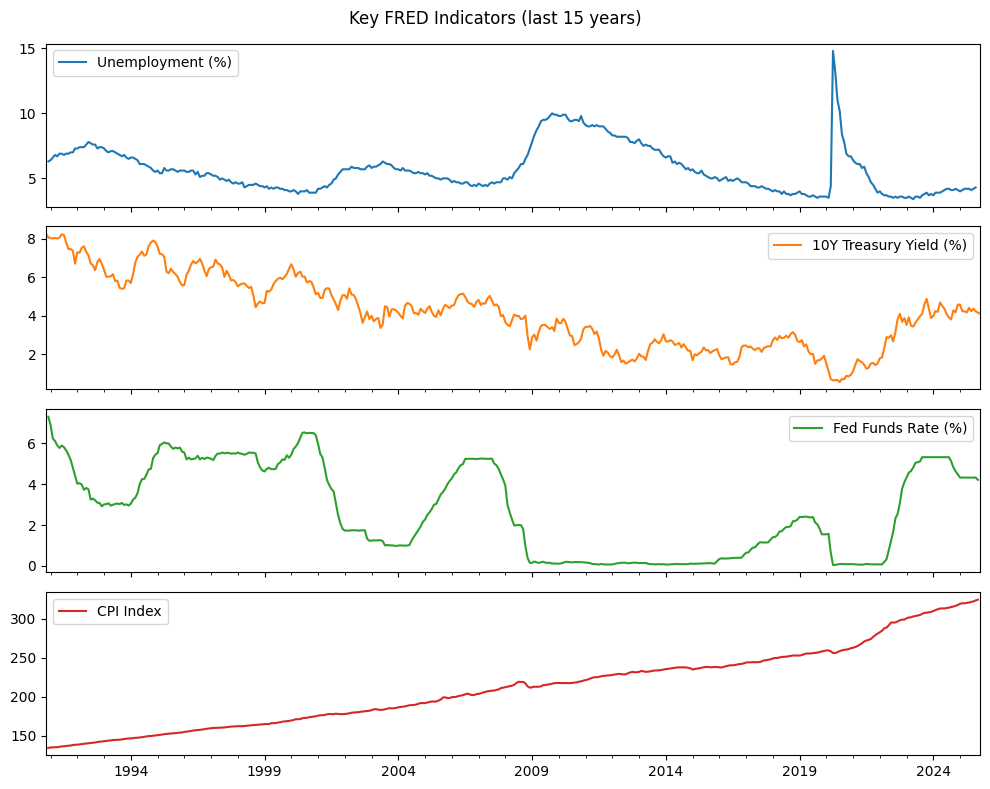

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred

fred = Fred(api_key="ee033b97982fae1cf18e225901b5b180")

# Pick a few interesting series
series = {
    "Unemployment (%)": "UNRATE",
    "10Y Treasury Yield (%)": "DGS10",
    "Fed Funds Rate (%)": "FEDFUNDS",
    "CPI Index": "CPIAUCSL",
}

# Download and combine 15 years of data
start = pd.Timestamp.now() - pd.DateOffset(years=35)
df = pd.DataFrame({name: fred.get_series(sid) for name, sid in series.items()})
df = df[df.index >= start]

df = df.resample("M").last()


# Plot
df.plot(subplots=True, figsize=(10, 8), title="Key FRED Indicators (last 15 years)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_25301/561364186.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").last()


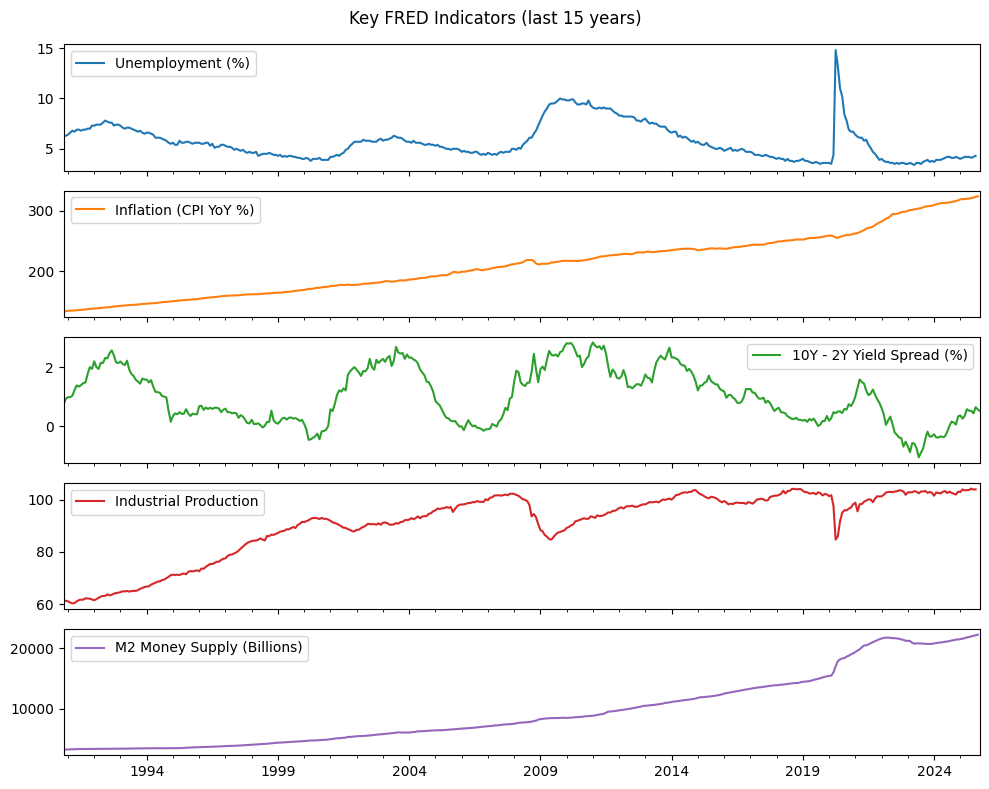

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred

fred = Fred(api_key="ee033b97982fae1cf18e225901b5b180")

# Pick a few interesting series
series = {
    "Unemployment (%)": "UNRATE",
    "Inflation (CPI YoY %)": "CPIAUCSL",
    "10Y - 2Y Yield Spread (%)": "T10Y2Y",
    "Industrial Production": "INDPRO",
    "M2 Money Supply (Billions)": "M2SL",
}

# Download and combine 15 years of data
start = pd.Timestamp.now() - pd.DateOffset(years=35)
df = pd.DataFrame({name: fred.get_series(sid) for name, sid in series.items()})
df = df[df.index >= start]

df = df.resample("M").last()


# Plot
df.plot(subplots=True, figsize=(10, 8), title="Key FRED Indicators (last 15 years)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_25301/4027254945.py:24: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["GDP Growth Rate (%)"] = df["GDP (Real, Billions)"].pct_change(4) * 100  # quarterly to annual rate
/tmp/ipykernel_25301/4027254945.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").last()


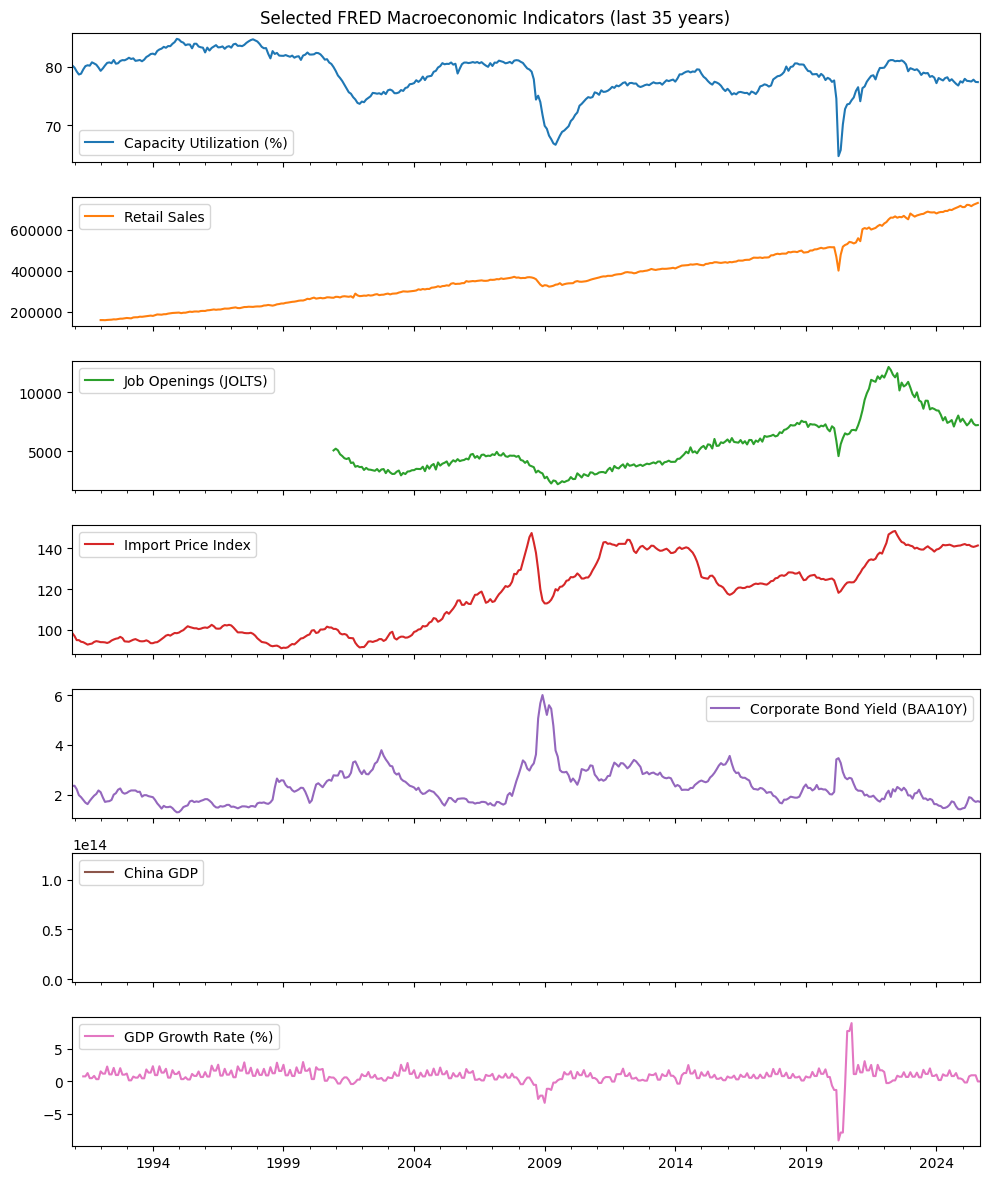

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

fred = Fred(api_key="ee033b97982fae1cf18e225901b5b180")

# Series to pull
series = {
    "GDP (Real, Billions)": "GDPC1",        # We'll turn this into GDP growth %
    "Capacity Utilization (%)": "TCU",
    "Retail Sales": "RSAFS",
    "Job Openings (JOLTS)": "JTSJOL",
    "Import Price Index": "IR",
    "Corporate Bond Yield (BAA10Y)": "BAA10YM",
    "China GDP": "CHNGDPNADSMEI",
}

# Download and combine
start = pd.Timestamp.now() - pd.DateOffset(years=35)
df = pd.DataFrame({name: fred.get_series(sid) for name, sid in series.items()})
df = df[df.index >= start]

# Compute GDP growth (YoY %)
df["GDP Growth Rate (%)"] = df["GDP (Real, Billions)"].pct_change(4) * 100  # quarterly to annual rate

# Drop raw GDP level (keep the growth)
df = df.drop(columns=["GDP (Real, Billions)"])

# Resample to monthly for alignment
df = df.resample("M").last()

# Plot
df.plot(subplots=True, figsize=(10, 12), title="Selected FRED Macroeconomic Indicators (last 35 years)")
plt.tight_layout()
plt.show()
